## Loading the python packages

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn import cluster, covariance, manifold, metrics

import matplotlib.ticker as ticker
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
dataset = pd.read_excel('ProcessedData.xlsx')

## Exploratory Data Analysis

In [3]:
# shape
dataset.shape

(3866, 13)

In [4]:
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


In [5]:
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000
mean,1933.500000,3.107346,2.906363,1.353337,0.937662,3.696844,1.741593,3.042938,0.716503,2.445939,3.561045,2.976203,3.671495
std,1116.162399,1.512556,1.066253,0.478068,1.249059,1.617554,0.934443,0.879385,0.450754,0.743267,1.304197,1.462937,1.183631
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,967.250000,2.000000,2.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,3.000000
50%,1933.500000,3.000000,3.000000,1.000000,0.000000,3.000000,1.000000,3.000000,1.000000,3.000000,4.000000,3.000000,4.000000
75%,2899.750000,4.000000,4.000000,2.000000,2.000000,5.000000,3.000000,4.000000,1.000000,3.000000,5.000000,4.000000,5.000000
max,3866.000000,6.000000,4.000000,2.000000,8.000000,6.000000,4.000000,4.000000,1.000000,3.000000,5.000000,5.000000,5.000000


## Data Visualization

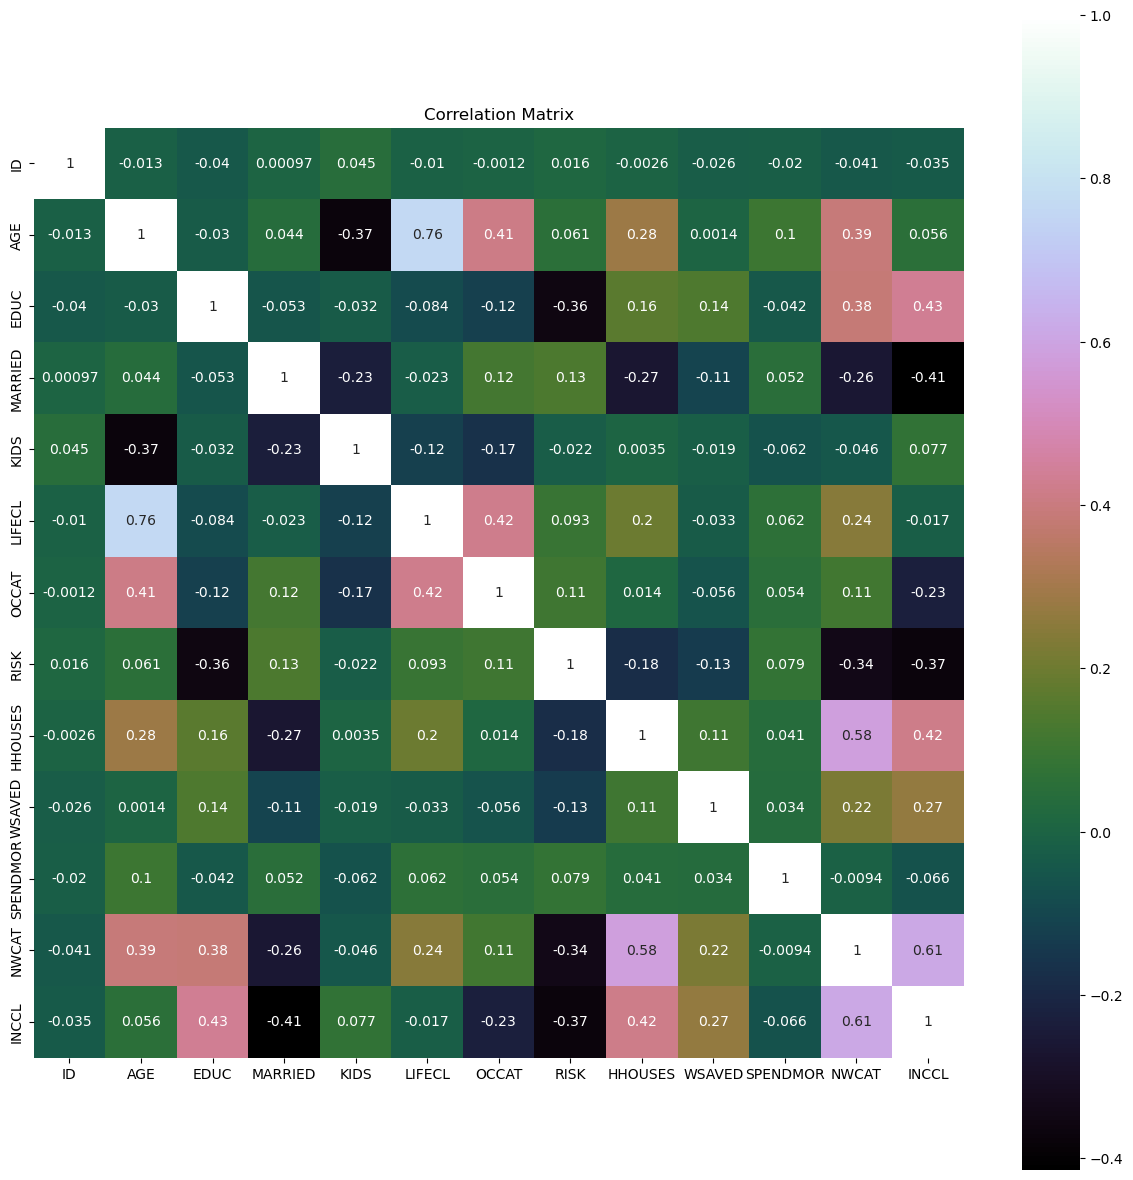

In [6]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

## Data Preparation

In [7]:
# Checking for any null values and removing
print('Null Values = ', dataset.isnull().values.any())

Null Values =  False


In [8]:
X = dataset.copy(deep=True)
X = X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


## Evaluate Algorithms and Models

### K-Means

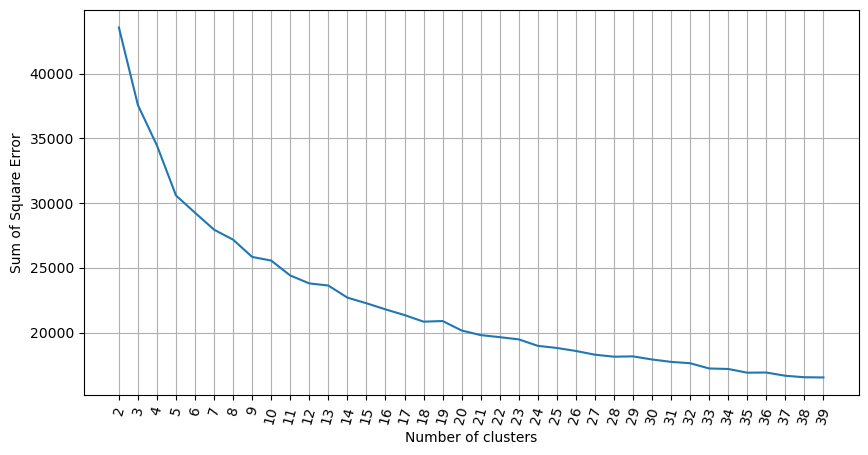

In [9]:
# Finding optimal number of clusters
distorsions = []
max_loop = 40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fit = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)
plt.show()

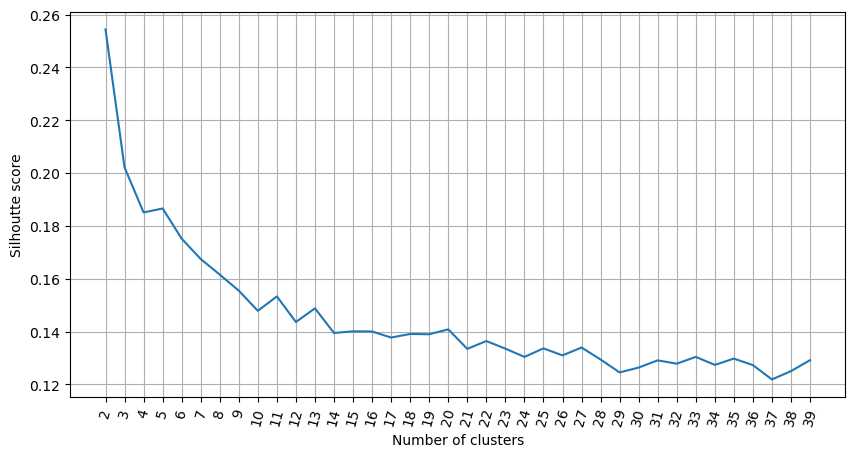

In [10]:
silhouette_score_ = []
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(X)
    silhouette_score_.append(silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score_)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte score")
plt.grid(True)
plt.show()

In [12]:
# Fit with k-means
n_clust = 7
k_means = cluster.KMeans(n_clusters=n_clust)
k_means.fit(X)
kmeans_target_labels = kmeans.predict(X)

### Affinity Propagation

In [13]:
ap = AffinityPropagation(damping=0.5, max_iter=250, affinity='euclidean')
ap.fit(X)
ap_target_labels = ap.predict(X)

In [14]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print(f'Estimated number of clusters: {n_clusters_}')

Estimated number of clusters: 161


### Clusters Evaluation

In [16]:
print(f"km = {metrics.silhouette_score(X, k_means.labels_, metric='euclidean')}")
print(f"ap = {metrics.silhouette_score(X, ap.labels_, metric='euclidean')}")

km = 0.1670283545079419
ap = 0.09709119835913949


## Conclusions

In [17]:
# Clusters intuition
cluster_output = pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])], axis=1)
output = cluster_output.groupby('cluster').mean()
output


,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,1.884774,2.382716,1.337449,2.170782,3.358025,1.454733,3.413580,0.489712,2.222222,4.524691,1.672840,3.069959
1,4.676433,3.466242,1.226752,0.299363,5.356688,2.085350,2.749045,0.942675,2.630573,3.582166,4.526115,4.508280
2,2.518325,3.518325,1.120419,1.672775,2.869110,1.429319,2.575916,0.913613,2.583770,1.965969,4.164921,4.683246
3,4.825633,2.157973,1.573770,0.190760,5.612519,2.359165,3.543964,0.710879,2.266766,3.870343,2.366617,2.685544
4,2.451264,3.474729,1.157040,1.460289,2.723827,1.402527,2.541516,0.953069,2.714801,4.449458,3.981949,4.615523
5,1.918831,2.879870,1.628247,0.001623,1.373377,1.530844,3.163961,0.431818,2.407468,3.545455,1.866883,3.043831
6,1.844086,2.327957,1.319892,2.037634,3.327957,1.451613,3.301075,0.462366,2.193548,2.040323,1.626344,3.064516


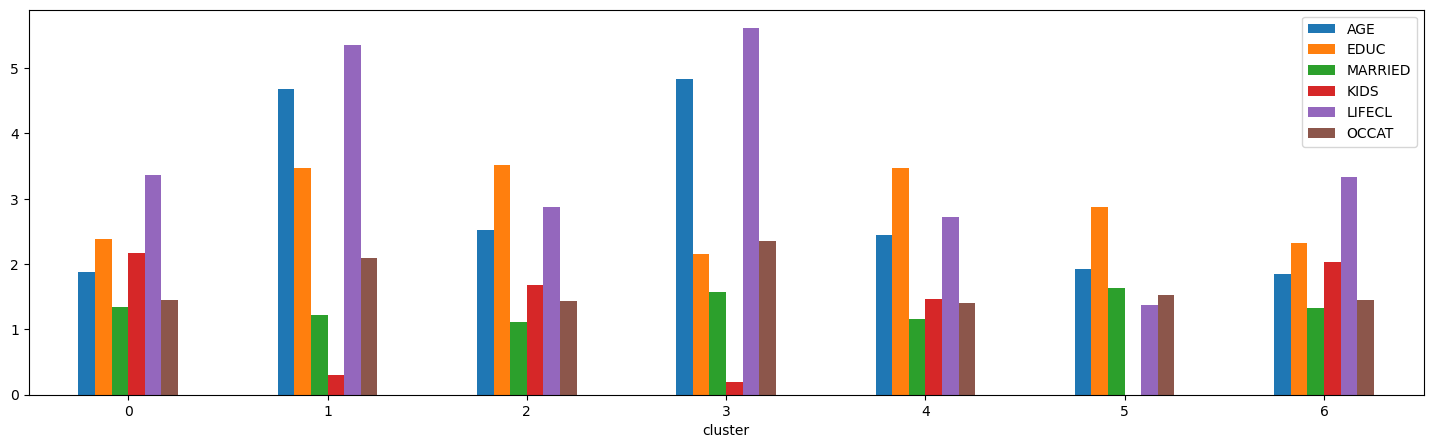

In [18]:
# Demographics features
output[['AGE', 'EDUC', 'MARRIED', 'KIDS', 'LIFECL', 'OCCAT']].plot.bar(rot=0, figsize=(18, 5))
plt.show()

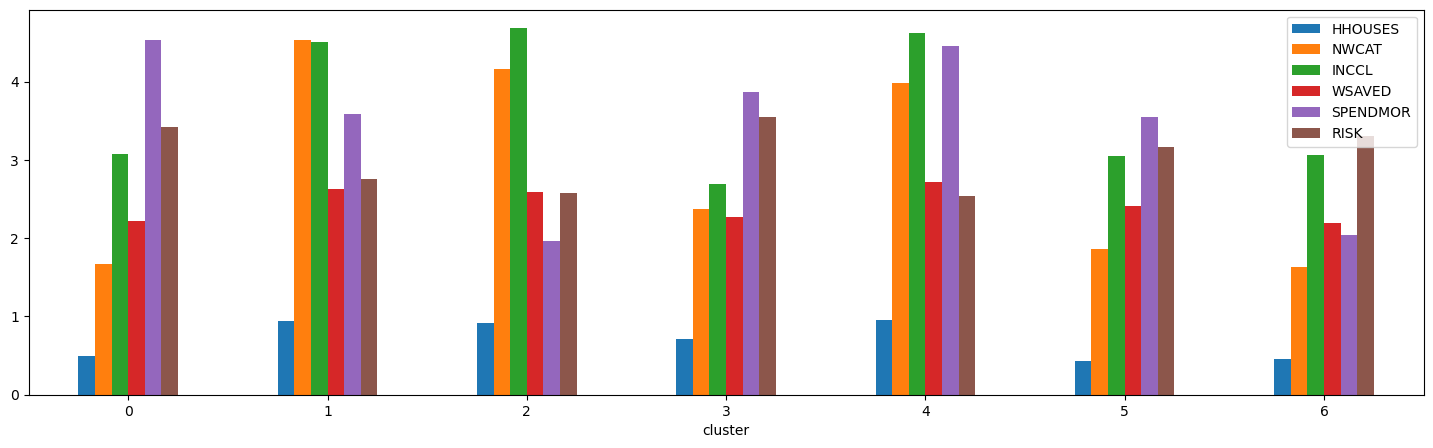

In [21]:
# Financial features and features 
# related to willingness to take risk
output[['HHOUSES', 'NWCAT', 'INCCL', 'WSAVED', 'SPENDMOR', 'RISK']].plot.bar(rot=0, figsize=(18, 5))
plt.show()

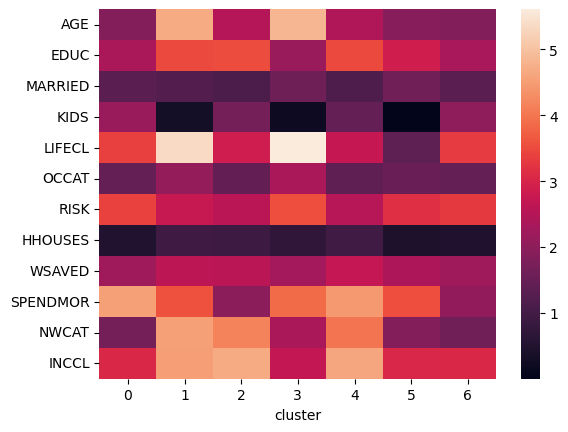

In [23]:
sns.heatmap(output.T)
plt.show()

| Cluster| Features | Risk Capacity |
| --- | --- | --- |
| Cluster 0	 | Low Age, High Networth and Income, Less risky life category, willingness to spend more | High |
| Cluster 1	 | High Age, low net worth and Income, highly risky life category, Willing ness to take risk, low education | High |
| Cluster 2	 | High Age, high net worth and Income, highly risky life category, Willing ness to to take risk, own house | Medium |
| Cluster 3	 | 	Low age, very low income and net worth, high willingness to take risk, many kids | Low |
| Cluster 4	 | Medium age, very high income and net worth, high willingness to take risk, many kids, own house | High |
| Cluster 5	 | Low age, very low income and net worth, high willingness to take risk, no kids | Medium |
| Cluster 6	 | Low age, medium income and net worth, high willingness to take risk, many kids, own house | Low |